**Airbnb Python Data Analytics Project**

**Importing libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

**Loading Dataset**

In [ ]:
df = pd.read_csv('F:\Projects\Python\Airbnb\Airbnb_dataset.csv')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\HP\AppData\Local\Temp\ipykernel_6540\1395295729.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('F:\Projects\Python\Airbnb\Airbnb_dataset.csv')


**Initial Data Exploration**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


**Data Cleaning**

In [5]:
# Identifying columns with null values
df.isna().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
dtype: int64

In [6]:
# Dropping rows with null values
df.dropna(inplace=True)

In [7]:
# Removing duplicate rows
df[df.duplicated()]

df.drop_duplicates(inplace=True)

In [8]:
# Removing text strings from numeric columns
df['rating'].replace(['New ', 'No rating'], np.nan, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6540\142380429.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].replace(['New ', 'No rating'], np.nan, inplace=True)


In [9]:
# Changing data types
df['id'] = df['id'].astype(object)

df['host_id'] = df['host_id'].astype(object)

df['rating'] = df['rating'].astype(float)

**Data Analysis**

In [10]:
# Removing outliers
df2 = df[df['price'] < 1500]

In [11]:
# Average price by room type
price_by_room_type = df.groupby('room_type').agg({'price': 'mean'}).sort_values(by='price', ascending=False)
print(price_by_room_type)
print('Hotel rooms have the highest average price, while private rooms have the lowest.')

                      price
room_type                  
Hotel room       415.053571
Entire home/apt  223.025152
Shared room      156.680412
Private room     139.574792
Hotel rooms have the highest average price, while private rooms have the lowest.


In [12]:
# Average price by neighbourhood
df_avg_price = df2.groupby('neighbourhood_group').agg({'price': 'mean'}).sort_values(by='price', ascending=False)
print(df_avg_price)
print('Manhattan has the highest average price, while Staten Island has the lowest.')

                          price
neighbourhood_group            
Manhattan            204.146014
Brooklyn             155.138317
Queens               121.681939
Staten Island        118.780069
Bronx                107.990506
Manhattan has the highest average price, while Staten Island has the lowest.


In [13]:
# Rating by room type
room_type_rating = df.groupby('room_type').agg({'rating':'mean'}).sort_values(by='rating', ascending=False)
print(room_type_rating)
print('Homes/Apartments tend to have the highest average customer ratings, while hotel rooms have the lowest.')

                   rating
room_type                
Entire home/apt  4.752082
Private room     4.716071
Shared room      4.648069
Hotel room       4.540115
Homes/Apartments tend to have the highest average customer ratings, while hotel rooms have the lowest.


In [14]:
# Adding new column called 'Price per bed'
df2['price_per_bed'] = df2['price'] / df2['beds']

C:\Users\HP\AppData\Local\Temp\ipykernel_6540\3558805739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price_per_bed'] = df2['price'] / df2['beds']


**Data Visualization**

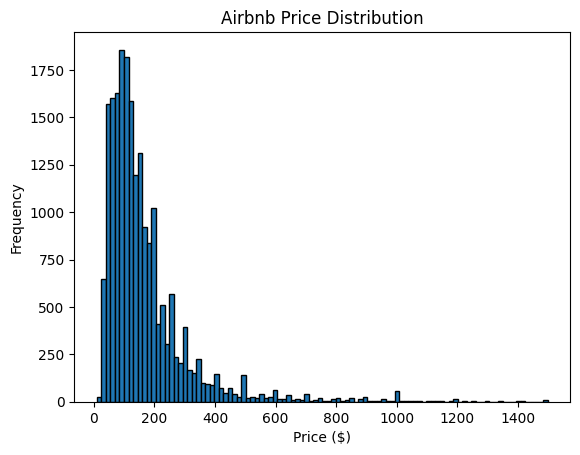

The price distribution appears to be right-skewed, with most listings priced below $200, and an average price of $165.


In [15]:
# Plotting the price distribution of the Airbnb listings
plt.hist(df2['price'], bins=100, edgecolor = 'black')
plt.title('Airbnb Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()
print('The price distribution appears to be right-skewed, with most listings priced below $200, and an average price of $165.')

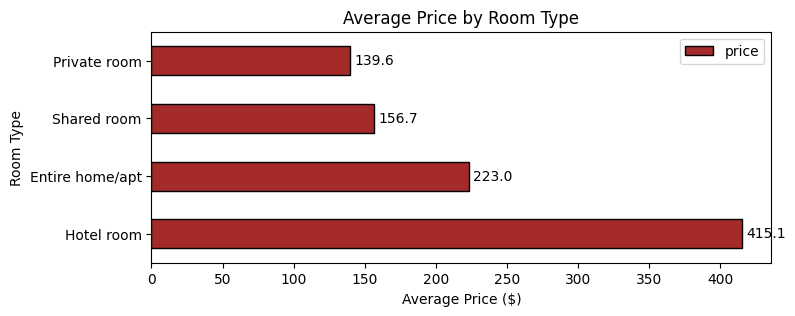

In [16]:
# Plotting the average price by room type
price_by_room_type.plot(kind='barh', color='brown', figsize=(8, 3), edgecolor='black')
plt.title('Average Price by Room Type')
plt.xlabel('Average Price ($)')
plt.ylabel('Room Type')
plt.bar_label(plt.gca().containers[0], fmt='%.1f', padding=3)
plt.show()

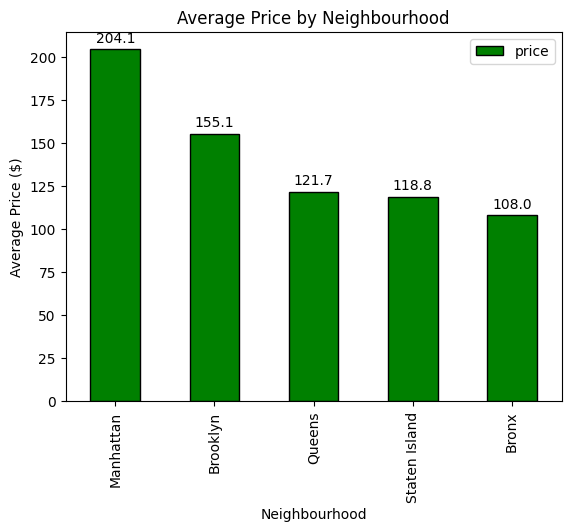

In [17]:
# Plotting the average price by neighbourhood
df_avg_price.plot(kind='bar', color='green', edgecolor='black')
plt.title('Average Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price ($)')
plt.bar_label(plt.gca().containers[0], fmt='%.1f', padding=3)
plt.show()

(4.0, 5.0)

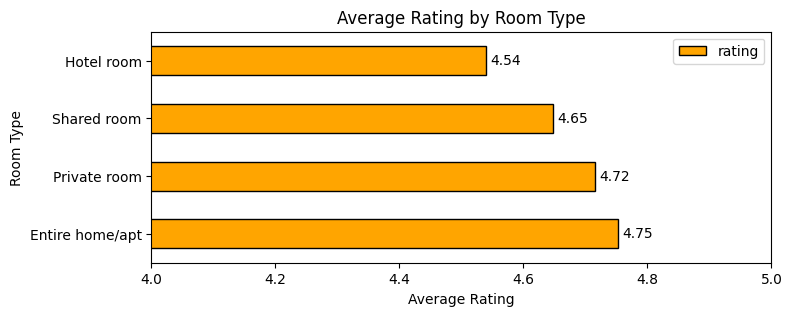

In [18]:
# Plotting the average rating by room type
room_type_rating.plot(kind='barh', color='orange', figsize=(8, 3), edgecolor='black')
plt.title('Average Rating by Room Type')
plt.xlabel('Average Rating')
plt.ylabel('Room Type')
plt.bar_label(plt.gca().containers[0], fmt='%.2f', padding=3)
plt.xlim(4,5)